In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [41]:
data = pd.read_csv('./data/Titanic_train.csv')

In [3]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA(탐색적 데이터 분석)
* 데이터의 특성, 분포를 파악 → 변환이 필요하면 변환
* EDA를 하면서 데이터 전처리 진행
* ex) 성별같이 컴퓨터가 인식하지 못하는 데이터를 0,1로 변환 등
* 수치형 데이터, 범주형 데이터를 따로 분석 (데이터프레임 분리나 필터링)

## 0. 결측값 처리

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [7]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [8]:
data.drop('Cabin',axis=1,inplace=True)

In [10]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 1. 범주형 데이터와 수치형 데이터 분리

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
categorical = data.select_dtypes(exclude=['number']).columns.tolist()
numerical = data.select_dtypes(include=['number']).columns.tolist()

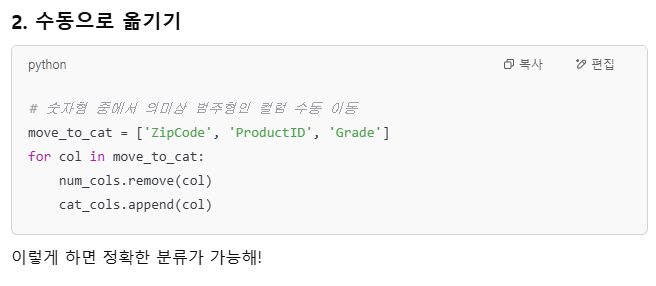

In [17]:
categorical

['Name', 'Sex', 'Ticket', 'Embarked']

In [23]:
data.loc[:,categorical]

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [25]:
data.loc[:,categorical]['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

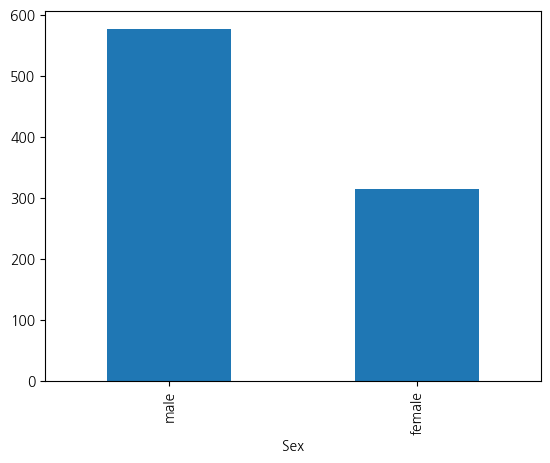

In [43]:
data.loc[:,categorical]['Sex'].value_counts().plot(kind='bar')
plt.show()

In [20]:
data.loc[:,numerical]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


## 2. 컬럼별로 살펴보면서 특성 파악해보기

In [26]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [32]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

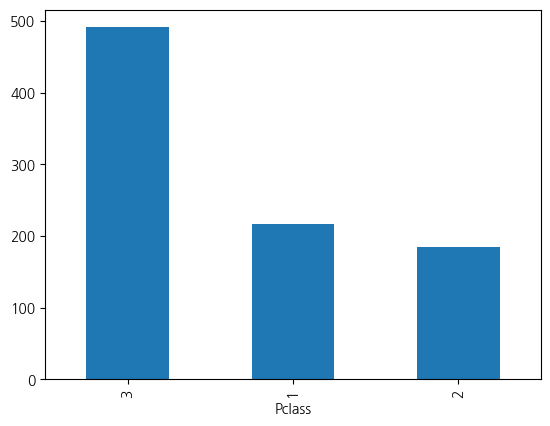

In [44]:
data['Pclass'].value_counts().plot(kind='bar')
plt.show()

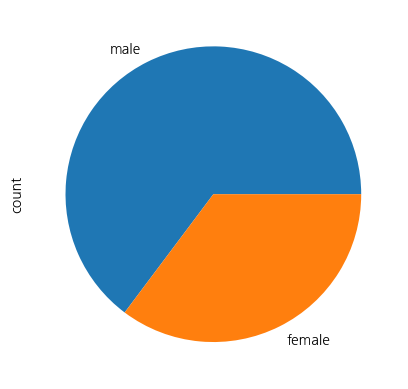

In [45]:
data['Sex'].value_counts().plot(kind='pie')
plt.show()

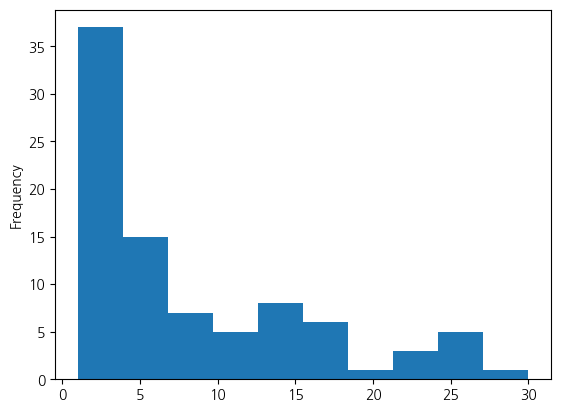

In [46]:
data['Age'].value_counts().plot(kind='hist')
plt.show()

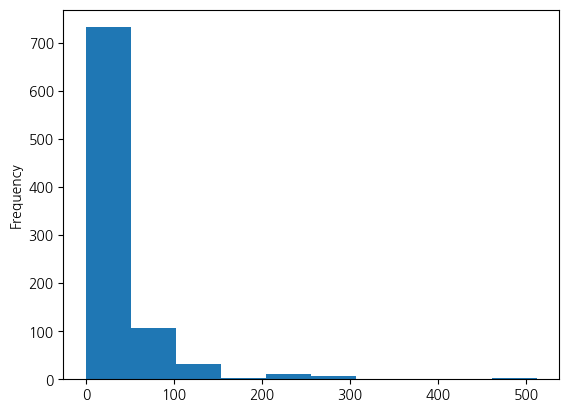

In [47]:
data['Fare'].plot(kind='hist')
plt.show()

In [51]:
data.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


## 종속 변수(Survived)와 독립 변수(Survived 제외 나머지) 파악
### → groupby 해보기

In [53]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
data.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### Pclass가 생존율에 영향을 미침 
* 선실등급이 높을수록 생존율도 높음

In [54]:
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Sex가 생존율에 영향을 미침 
* 여성의 생존율이 남성의 생존율보다 높음

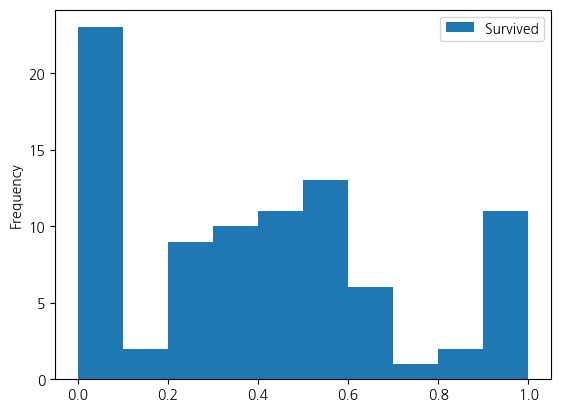

In [56]:
data.groupby('Age')[['Survived']].mean().plot(kind='hist')
plt.show()

### 나이 구간화 필요
* pd.cut(data['Age'], bins=[구간], labels=['구간의 이름'])

In [57]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [59]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80+']

data.insert(6, 'age_group', pd.cut(data['Age'], bins=bins, labels=labels, right=False))

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,age_group,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,20s,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,30s,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,20s,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,30s,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,30s,0,0,373450,8.0500,NaN,S


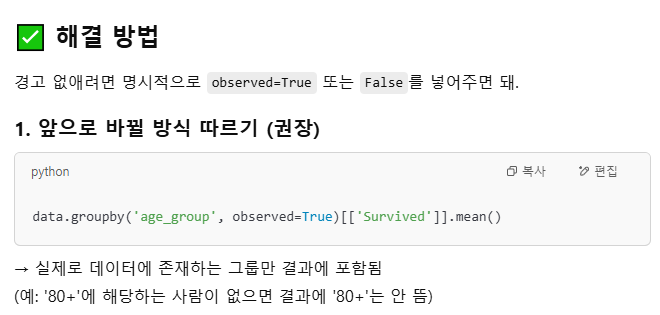

In [72]:
data['age_group'].value_counts(ascending=True)

age_group
80+      1
70s      6
60s     19
50s     48
0s      62
40s     89
10s    102
30s    167
20s    220
Name: count, dtype: int64

In [69]:
data.groupby('age_group',observed=True)[['Survived']].value_counts(ascending=True)

age_group  Survived
0s         0            24
           1            38
10s        1            41
           0            61
20s        1            77
           0           143
30s        1            73
           0            94
40s        1            34
           0            55
50s        1            20
           0            28
60s        1             6
           0            13
70s        0             6
80+        1             1
Name: count, dtype: int64

In [62]:
data.groupby('age_group',observed=True)[['Survived']].mean()

,Survived
age_group,
0s,0.612903
10s,0.401961
20s,0.350000
30s,0.437126
40s,0.382022
50s,0.416667
60s,0.315789
70s,0.000000
80+,1.000000


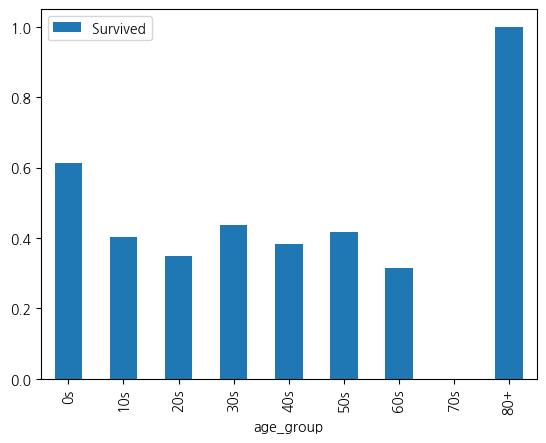

In [65]:
data.groupby('age_group',observed=True)[['Survived']].mean().plot(kind='bar')
plt.show()

In [66]:
data[
    data['age_group'] == '70s'
]

,PassengerId,Survived,Pclass,Name,Sex,Age,age_group,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,70s,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,70s,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,70s,0,0,PC 17609,49.5042,NaN,C
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,70s,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,70s,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,70s,0,0,347060,7.7750,NaN,S


In [67]:
data[
    data['age_group'] == '80+'
]

,PassengerId,Survived,Pclass,Name,Sex,Age,age_group,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,80+,0,0,27042,30.0,A23,S


In [73]:
data.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [75]:
data.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [78]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [76]:
data.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### Pclass, Sex, age_group에 따른 생존율 동시에 보기

In [82]:
data.groupby(['Pclass','Sex'], observed=True)[['Survived']].mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [81]:
data.groupby(['Pclass','Sex','age_group'], observed=True)[['Survived']].mean()

Survived
Pclass Sex    age_group          
1      female 0s         0.000000
              10s        1.000000
              20s        0.937500
              30s        1.000000
              40s        1.000000
              50s        0.916667
              60s        1.000000
       male   0s         1.000000
              10s        0.400000
              20s        0.500000
              30s        0.521739
              40s        0.375000
              50s        0.266667
              60s        0.100000
              70s        0.000000
              80+        1.000000
2      female 0s         1.000000
              10s        1.000000
              20s        0.880000
              30s        0.941176
              40s        0.900000
              50s        0.833333
       male   0s         1.000000
              10s        0.100000
              20s        0.000000
              30s        0.096774
              40s        0.125000
              50s        0.000000
              60s        0.333333
              70s        0.000000
3      female 0s         0.523810
              10s        0.541667
              20s        0.483871
              30s        0.437500
              40s        0.000000
              60s        1.000000
       male   0s         0.380952
              10s        0.095238
              20s        0.156863
              30s        0.150943
              40s        0.080000
              50s        0.000000
              60s        0.000000
              70s        0.000000

In [84]:
data.groupby(['Pclass','Sex','age_group'], observed=True)[['Survived']].mean().sort_values('Survived', ascending=False)

Survived
Pclass Sex    age_group          
1      female 10s        1.000000
              30s        1.000000
              60s        1.000000
              40s        1.000000
       male   0s         1.000000
2      female 10s        1.000000
              0s         1.000000
3      female 60s        1.000000
2      male   0s         1.000000
1      male   80+        1.000000
2      female 30s        0.941176
1      female 20s        0.937500
              50s        0.916667
2      female 40s        0.900000
              20s        0.880000
              50s        0.833333
3      female 10s        0.541667
              0s         0.523810
1      male   30s        0.521739
              20s        0.500000
3      female 20s        0.483871
              30s        0.437500
1      male   10s        0.400000
3      male   0s         0.380952
1      male   40s        0.375000
2      male   60s        0.333333
1      male   50s        0.266667
3      male   20s        0.156863
              30s        0.150943
2      male   40s        0.125000
1      male   60s        0.100000
2      male   10s        0.100000
              30s        0.096774
3      male   10s        0.095238
              40s        0.080000
1      female 0s         0.000000
2      male   50s        0.000000
              20s        0.000000
1      male   70s        0.000000
2      male   70s        0.000000
3      female 40s        0.000000
       male   50s        0.000000
              60s        0.000000
              70s        0.000000

## .corr()
* 변수들간의 상관관계 보기
* 문자형 데이터는 할 수 없음
* -1 : 음의 상관관계(반비례 ex. 집과 역의 거리가 멀어지면 집값이 떨어진다)
* 0 : 관계 없음
* 1 : 양의 상관관계(비례 ex. 날씨가 더워지면 아이스크림 판매량이 높아진다)

In [86]:
data.loc[:,numerical].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
